### Importing Libraries

In [1]:
#!pip install tensorflow
#!pip install keras
#!pip install sciket-learn

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

Using TensorFlow backend.


In [3]:
imgs_path = "c:/Users/deepa/OneDrive/Desktop/CNN Project/Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


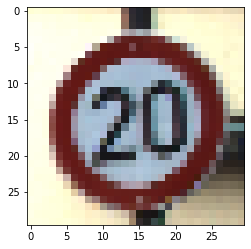

In [4]:
path = "c:/Users/deepa/OneDrive/Desktop/CNN Project/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [23]:
print(data[0][0][0])
print(len(data))
print(data.ndim)
print(data.shape)

[75 78 80]
78418
4
(78418, 30, 30, 3)


In [24]:
print(len(labels))
print(labels.ndim)
print(labels.shape)

78418
1
(78418,)


plt.figure(figsize=(7,7))
idx = 1

grid_data = data.iloc[idx].to_numpy().reshape(30,30)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (62734, 30, 30, 3) (62734,)
testing shape:  (15684, 30, 30, 3) (15684,)


In [27]:
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Train on 62734 samples, validate on 15684 samples
Epoch 1/15
62734/62734 [==============================] - 210s 3ms/step - loss: 1.7544 - accuracy: 0.5381 - val_loss: 0.4003 - val_accuracy: 0.8843
Epoch 2/15
62734/62734 [==============================] - 121s 2ms/step - loss: 0.7511 - accuracy: 0.7723 - val_loss: 0.3211 - val_accuracy: 0.9026
Epoch 3/15
62734/62734 [==============================] - 117s 2ms/step - loss: 0.5858 - accuracy: 0.8191 - val_loss: 0.2702 - val_accuracy: 0.9165
Epoch 4/15
62734/62734 [==============================] - 123s 2ms/step - loss: 0.4199 - accuracy: 0.8719 - val_loss: 0.1412 - val_accuracy: 0.9584
Epoch 5/15
62734/62734 [==============================] - 120s 2ms/step - loss: 0.3406 - accuracy: 0.8973 - val_loss: 0.1137 - val_accuracy: 0.9644
Epoch 6/15
62734/62734 [==============================] - 125s 2ms/step - loss: 0.2928 - accuracy: 0.9101 - val_loss: 0.0996 - val_accuracy: 0.9688
Epoch 7/15
62734/62734 [==============================] - 119s

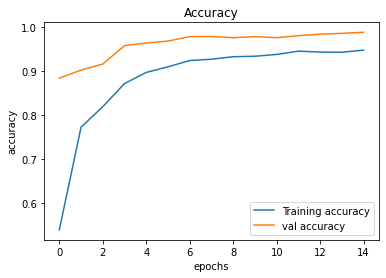

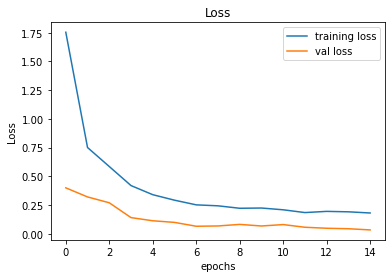

In [31]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("c:/Users/deepa/OneDrive/Desktop/CNN Project/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "c:/Users/deepa/OneDrive/Desktop/CNN Project"
test_imgs = test['Path'].values
test_data = []
test_labels = test['ClassId'].values
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
#    test_labels.append(im)
test_data = np.array(test_data)
#test_labels =np.array(test_labels)
predictions = model.predict_classes(test_data)
print("accuracy: ", accuracy_score(test_labels, predictions))

accuracy:  0.9513064133016627


In [47]:
model.save('traffic_classifier.h5')

In [50]:
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs
model = load_model('traffic_classifier.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (50km/h)',
            4:'Speed limit (60km/h)',
            5:'Speed limit (70km/h)',
            6:'Speed limit (80km/h)',
            7:'End of speed limit (80km/h)',
            8:'Speed limit (100km/h)',
            9:'Speed limit (120km/h)',
            10:'No passing',
            11:'No passing veh over 3.5 tons',
            12:'Right-of-way at intersection',
            13:'Priority road',
            14:'Yield',
            15:'Stop',
            16:'No vehicles',
            17:'Veh > 3.5 tons prohibited',
            18:'No entry',
            19:'General caution',
            20:'Dangerous curve left',
            21:'Dangerous curve right',
            22:'Double curve',
            23:'Bumpy road',
            24:'Slippery road',
            25:'Road narrows on the right',
            26:'Road work',
            27:'Traffic signals',
            28:'Pedestrians',
            29:'Children crossing',
            30:'Bicycles crossing',
            31:'Beware of ice/snow',
            32:'Wild animals crossing',
            33:'End speed + passing limits',
            34:'Turn right ahead',
            35:'Turn left ahead',
            36:'Ahead only',
            37:'Go straight or right',
            38:'Go straight or left',
            39:'Keep right',
            40:'Keep left',
            41:'Roundabout mandatory',
            42:'End of no passing',
            43:'End no passing veh > 3.5 tons' }
#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Speed limit (50km/h)
Ahead only
Double curve
Right-of-way at intersection
Stop


In [53]:
import pickle
pickle_out = open("tfcnp1.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()